In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. 데이터 로드

In [156]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- 데이터 조작

In [157]:
# dataset 확인: 결측치 항목 여부 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [158]:
# 결측치 항목 
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [159]:
# Item_Type별 Item_Weight 추출
#   평균값의 차이가 크지 않은 것으로 보아 전체 항목의 평균값을 NaN값에 기재
df.groupby('Item_Type')[['Item_Weight']].mean()

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [160]:
# Item_Weight: 결측치를 평균값으로 기재
item_weight_mean = df.Item_Weight.mean()

In [161]:
item_weight = df.Item_Weight.fillna(item_weight_mean, inplace=True)
item_weight

In [162]:
# Outlet_Size: 결측치를 최빈값으로 기재
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [163]:
df.Outlet_Size = df.Outlet_Size.fillna('Medium')
df.Outlet_Size.isna().sum()

0

In [164]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [165]:
# Item_Fat_Content: 문자열 통일
df.Item_Fat_Content.replace(['Low Fat', 'low fat', 'Regular', 'reg'], ['LF', 'LF', 'REG', 'REG'], inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,REG,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,REG,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [166]:
df.Item_Fat_Content.unique()

array(['LF', 'REG'], dtype=object)

In [168]:
# 데이터 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


for feature in df.columns[:]:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

In [169]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,284,0,664,4,5592,9,4,1,0,1,2540
1,8,57,1,880,14,473,3,8,1,2,2,422
2,662,376,0,715,10,2901,9,4,1,0,1,1639
3,1121,393,1,0,6,4227,0,3,1,2,0,670
4,1297,265,0,0,9,627,1,1,0,2,1,865


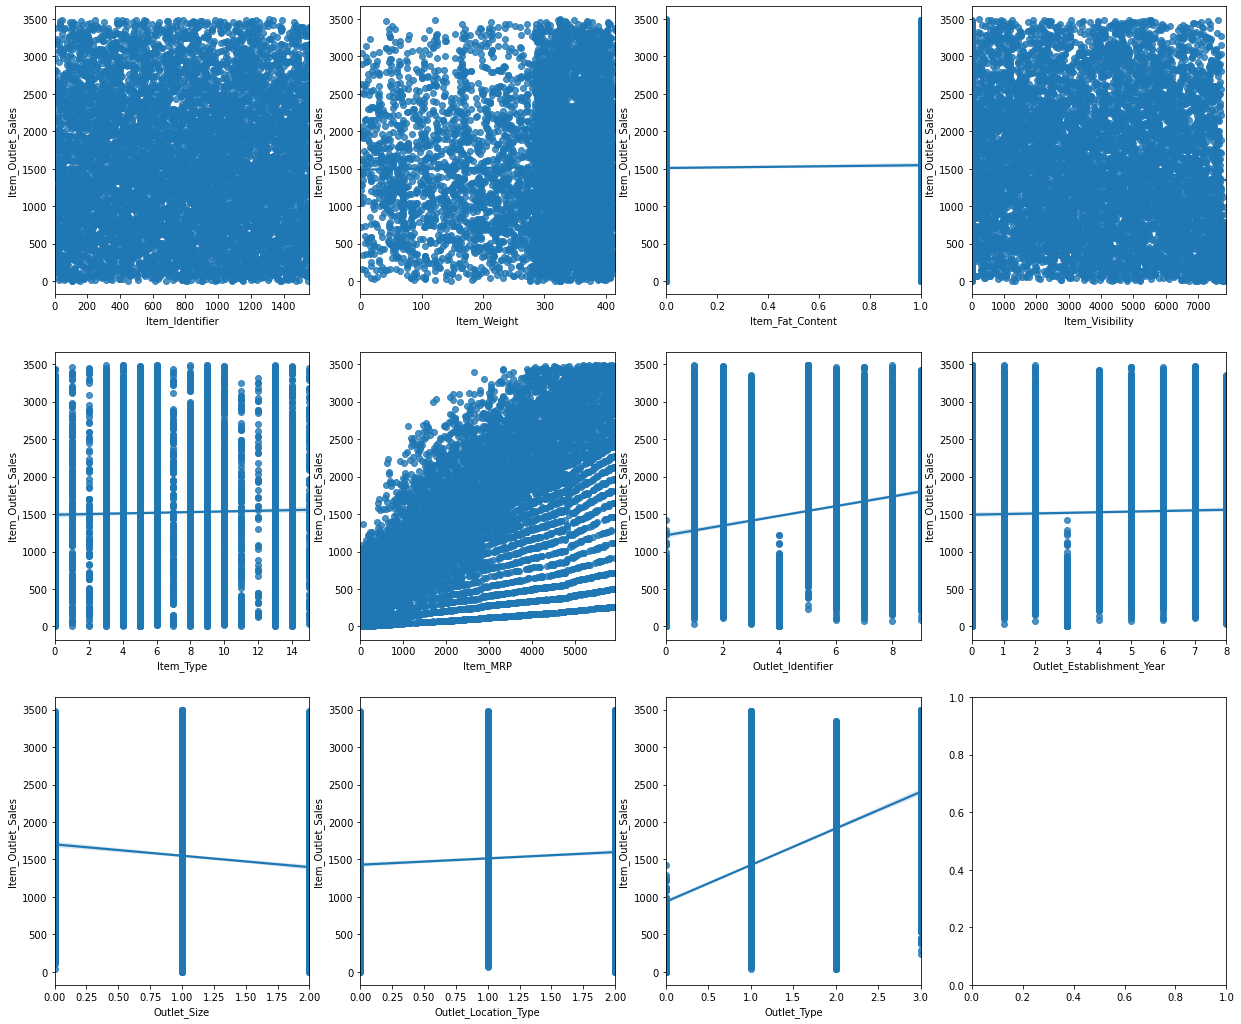

In [173]:
# 데이터 시각화
_, axs = plt.subplots(nrows=3, ncols=4, figsize=(21, 18))

for i, feature in enumerate(df.columns[:-1]):
    row, col = i//4, i%4
    sns.regplot(x=feature, y='Item_Outlet_Sales', data=df, ax=axs[row][col])

- feature별 분포 확인

In [174]:
from sklearn.linear_model import LinearRegression

for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1)
    y = df.Item_Outlet_Sales
    lr = LinearRegression()
    lr.fit(X,y)
    score = lr.score(X,y)
    print(f'{feature}: {score:.4f}')

Item_Identifier: 0.0000
Item_Weight: 0.0002
Item_Fat_Content: 0.0004
Item_Visibility: 0.0120
Item_Type: 0.0004
Item_MRP: 0.3285
Outlet_Identifier: 0.0401
Outlet_Establishment_Year: 0.0006
Outlet_Size: 0.0099
Outlet_Location_Type: 0.0056
Outlet_Type: 0.1795


- 훈련, 테스트

In [199]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Item_Identifier.values.reshape(-1,1), df.Item_Outlet_Sales.values.reshape(-1,1), test_size=0.1, random_state=2021
)


In [200]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

-0.0037346331099616936

In [201]:
X_test[0]

array([1053])